# INHALTSVERZEICHNIS
- **Alle Bibliotheken**
- **Daten: Analyse und Bereinigung**
- **Tokenizing**
- **Stemming & Lemmatizing**
- **Vectorizing**
- **Modelle**
    - **I. Beste Parameter für jedes Modell**
    - **II. Modelle miteinander vergleichen**
    - **III. Pipeline Modell**
    - **IV. Test**
    - **V. Speichern des Modells**

# ALLE BIBLIOTHEKEN

In [46]:
# DATEN
import pandas as pd
from sklearn.model_selection import train_test_split

# TOKENIZING
import nltk

from nltk.tokenize import word_tokenize
nltk.download('punkt')

from nltk.corpus import stopwords
nltk.download('stopwords')

import string

# STEMMING & LEMMATIZING
from nltk.stem import SnowballStemmer
from nltk.stem import WordNetLemmatizer
nltk.download('omw') # Das deutsche Wörterbuch "GermaLemma"
nltk.download('wordnet')
nltk.download('omw-1.4')
import spacy 
# Man muss spacy installieren (pip install spacy) und das Modell "de_core_news_sm" mit dem Befehl 
# "python -m spacy download de_core_news_sm" über die Befehlszeile herunterladen.

# VECTORIZING
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.feature_extraction.text import CountVectorizer

# MODELLS
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import MultinomialNB
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.svm import SVC
from sklearn.model_selection import GridSearchCV

from sklearn.pipeline import Pipeline

# EVALUATION
from sklearn.metrics import classification_report, confusion_matrix, mean_absolute_error, recall_score

# VISUALISATION
import seaborn as sns
import matplotlib.pyplot as plt

# SPEICHERN DES MODELLS
import pickle

[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\natal\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\natal\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package omw to
[nltk_data]     C:\Users\natal\AppData\Roaming\nltk_data...
[nltk_data]   Package omw is already up-to-date!
[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\natal\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package omw-1.4 to
[nltk_data]     C:\Users\natal\AppData\Roaming\nltk_data...
[nltk_data]   Package omw-1.4 is already up-to-date!


# DATEN: ANALYSE & BEREINIGUNG

In [2]:
df = pd.read_csv("toxic_comments_de_unprocessed.csv")
print("--------------DataFrame Head-------------------\n")
print(df.head(), "\n")
print("--------------DataFrame Shape-------------------\n")
print(df.shape, "\n")
print("--------------DataFrame Unique-------------------\n")
print(df.nunique(), "\n")
print("--------------DataFrame Feature Names-------------------\n")
print(df.columns, "\n")

# Alle Labels zu einem bringen
df["label"] = df[['toxic', 'severe_toxic', 'obscene', 'threat', 'insult', 'identity_hate']].any(axis=1).astype(int)
df = df.drop(['toxic', 'severe_toxic', 'obscene', 'threat', 'insult','identity_hate'], axis=1)
print("--------------DataFrame Head mit nur 1 Label-------------------\n")
print(df.head(), "\n")

# Die Anzahl der Samples der Klasse 0 reduzieren
print("--------------Anzahl der Samples jeder Klasse-------------------\n")
print(df["label"].value_counts(), "\n")
df = df[df["label"]==0].sample(n=15100, random_state=42).append(df[df["label"]==1]).reset_index(drop=True)
print("--------------Anzahl der Samples jeder Klasse nach der Reduzierung-------------------\n")
print(df["label"].value_counts(), "\n")

--------------DataFrame Head-------------------

                                        comment_text  toxic  severe_toxic  \
0  "\n\n NPOV wieder\n\nZunächst einmal bin ich B...      0             0   
1  Ich habe gerade eine auf meiner Benutzerseite ...      0             0   
2  Dein Name ist ich träume von Pferden was für e...      1             0   
3  "\n\n mehr NPOV-Probleme\n\nDieser Artikel ist...      0             0   
4  "\n Wir behaupten nie, dass es ein ""Sexspiel"...      0             0   

   obscene  threat  insult  identity_hate  
0        0       0       0              0  
1        0       0       0              0  
2        1       0       1              0  
3        0       0       0              0  
4        0       0       0              0   

--------------DataFrame Shape-------------------

(148645, 7) 

--------------DataFrame Unique-------------------

comment_text     148645
toxic                 2
severe_toxic          2
obscene               2
threat     

C:\Users\natal\AppData\Local\Temp\ipykernel_22764\1744242948.py:20: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df[df["label"]==0].sample(n=15100, random_state=42).append(df[df["label"]==1]).reset_index(drop=True)


# TOKENIZING 

In [3]:
# Ich will erstmal alles auf einem Beispiel ausprobieren
example = df.iloc[1]["comment_text"]
print("--------------Example-------------------\n")
print(example, "\n")

# Tokenize mit NLTK-Bibliothek
tokens = word_tokenize(example, language="german")
print("--------------Einzelne Tokens aus dem Example-------------------\n")
print(tokens, "\n")

tokens_without_punctuation = [i for i in tokens if i not in string.punctuation]
print("--------------Tokens ohne Interpunktion-------------------\n")
print(tokens_without_punctuation, "\n")

stop_words = stopwords.words("german")
print("--------------Deutsche Stopwords der NLTK-Bibliothek-------------------\n")
print(stop_words, "\n")

tokens_without_punctuation_and_stopwords = [i for i in tokens_without_punctuation if i not in stop_words]
print("--------------Tokens ohne Interpunktion und Stopwords-------------------\n")
print(tokens_without_punctuation_and_stopwords)

--------------Example-------------------

Möglicherweise rechtfertigt es eine Umleitung auf Elemente, die nicht existieren, oder fiktive Elemente, aber wir müssen nicht Leuten nachgeben, die neue Elemente erfinden und dann für krumm befunden werden. 20:53, 24. November 2004 (UTC) 

--------------Einzelne Tokens aus dem Example-------------------

['Möglicherweise', 'rechtfertigt', 'es', 'eine', 'Umleitung', 'auf', 'Elemente', ',', 'die', 'nicht', 'existieren', ',', 'oder', 'fiktive', 'Elemente', ',', 'aber', 'wir', 'müssen', 'nicht', 'Leuten', 'nachgeben', ',', 'die', 'neue', 'Elemente', 'erfinden', 'und', 'dann', 'für', 'krumm', 'befunden', 'werden', '.', '20:53', ',', '24.', 'November', '2004', '(', 'UTC', ')'] 

--------------Tokens ohne Interpunktion-------------------

['Möglicherweise', 'rechtfertigt', 'es', 'eine', 'Umleitung', 'auf', 'Elemente', 'die', 'nicht', 'existieren', 'oder', 'fiktive', 'Elemente', 'aber', 'wir', 'müssen', 'nicht', 'Leuten', 'nachgeben', 'die', 'neue', '

# STEMMING & LEMMATIZING

In [4]:
def tokenized_and_stemmed(text):
    stemmer = SnowballStemmer(language="german")
    tokens = word_tokenize(text, language="german")
    tokens_without_punctuation = [i for i in tokens if i not in string.punctuation]
    tokens_without_punctuation_and_stopwords = [i for i in tokens_without_punctuation if i not in stop_words]
    stemmed_tokens = [stemmer.stem(i) for i in tokens_without_punctuation_and_stopwords]
    return stemmed_tokens

def tokenized_and_lemmatized(text):
    lemmatizer = WordNetLemmatizer()
    tokens = nltk.word_tokenize(text, language='german')
    tokens_without_punctuation = [i for i in tokens if i not in string.punctuation]
    tokens_without_punctuation_and_stopwords = [i for i in tokens_without_punctuation if i not in stop_words]
    lemmatized_tokes = [lemmatizer.lemmatize(i, 'v') for i in tokens_without_punctuation_and_stopwords]
    return lemmatized_tokes

def tokenized_and_lemmatized_spacy(text):
    nlp = spacy.load('de_core_news_sm')
    tokens = nltk.word_tokenize(text, language='german')
    tokens_without_punctuation = [i for i in tokens if i not in string.punctuation]
    tokens_without_punctuation_and_stopwords = [i for i in tokens_without_punctuation if i not in stop_words]
    tokenized_text = " ".join(tokens_without_punctuation_and_stopwords)
    doc = nlp(tokenized_text)
    lemmas = [token.lemma_ for token in doc]
    return lemmas


print("--------------Stemmed Tokens-------------------\n")
print(tokenized_and_stemmed(example), "\n")
print("--------------Lemmatized Tokens-------------------\n")
print(tokenized_and_lemmatized(example), "\n")
print("--------------Lemmatized Tokens Spacy-------------------\n")
print(tokenized_and_lemmatized_spacy(example), "\n")

--------------Stemmed Tokens-------------------

['moglicherweis', 'rechtfertigt', 'umleit', 'element', 'existi', 'fiktiv', 'element', 'muss', 'leut', 'nachgeb', 'neu', 'element', 'erfind', 'krumm', 'befund', '20:53', '24.', 'novemb', '2004', 'utc'] 

--------------Lemmatized Tokens-------------------

['Möglicherweise', 'rechtfertigt', 'Umleitung', 'Elemente', 'existieren', 'fiktive', 'Elemente', 'müssen', 'Leuten', 'nachgeben', 'neue', 'Elemente', 'erfinden', 'krumm', 'befunden', '20:53', '24.', 'November', '2004', 'UTC'] 

--------------Lemmatized Tokens Spacy-------------------

['möglicherweise', 'rechtfertigen', 'Umleitung', 'Element', 'existieren', 'fiktiv', 'Element', 'müssen', 'Leute', 'nachgeben', 'neu', 'Element', 'erfinden', 'krumm', 'befinden', '20:53', '24.', 'November', '2004', 'UTC'] 



Man sieht deutlich, dass SnowStemmer am besten den Text verarbeitet hat und weiter werde ich die Funktion "tokenized_and_stemmed" benutzen.

Ich war mit dem Ergebnis vom Stemming nicht zufrieden und wollte Lemmatisierung ausprobieren. 
Leider funktioniert die Lemmatisierung eines deutschen Textes noch schlimmer, als Stemming.

# VECTORIZING
Vergliechen werden TfidfVectorizer und CountVectorizer

In [5]:
vectorizer_tfidf = TfidfVectorizer(tokenizer = lambda x: tokenized_and_stemmed(x))
vectorizer_count = CountVectorizer(tokenizer = lambda x: tokenized_and_stemmed(x))

X_vectorized_tfidf = vectorizer_tfidf.fit_transform(df["comment_text"])
X_vectorized_count = vectorizer_count.fit_transform(df["comment_text"])

# Vergleich der zwei Vectorizer mit Hilfe der LogReg
model_tfidf = LogisticRegression(random_state=0)
X_train_tfidf, X_test_tfidf, y_train_tfidf, y_test_tfidf = train_test_split(X_vectorized_tfidf, df["label"], test_size=0.33, random_state=42)
model_tfidf.fit(X_train_tfidf, y_train_tfidf)
predictions_tfidf = model_tfidf.predict(X_test_tfidf)

model_count = LogisticRegression(random_state=0)
X_train_count, X_test_count, y_train_count, y_test_count = train_test_split(X_vectorized_count, df["label"], test_size=0.33, random_state=42)
model_count.fit(X_train_count, y_train_count)
predictions_count = model_count.predict(X_test_count)

print("--------------Report Modell mit TfidfVectorizer-------------------\n")
print(classification_report(y_test_tfidf, predictions_tfidf), "\n")
print("--------------Report Modell mit CountVectorizer-------------------\n")
print(classification_report(y_test_count, predictions_count))

C:\Users\natal\anaconda3\lib\site-packages\sklearn\feature_extraction\text.py:528: UserWarning: The parameter 'token_pattern' will not be used since 'tokenizer' is not None'
  warnings.warn(


--------------Report Modell mit TfidfVectorizer-------------------

              precision    recall  f1-score   support

           0       0.85      0.92      0.88      5036
           1       0.91      0.83      0.87      4926

    accuracy                           0.88      9962
   macro avg       0.88      0.88      0.88      9962
weighted avg       0.88      0.88      0.88      9962
 

--------------Report Modell mit CountVectorizer-------------------

              precision    recall  f1-score   support

           0       0.86      0.92      0.89      5036
           1       0.91      0.85      0.88      4926

    accuracy                           0.88      9962
   macro avg       0.89      0.88      0.88      9962
weighted avg       0.89      0.88      0.88      9962



C:\Users\natal\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


Das Ergebnis mit dem CountVectorizer ist besser, obwohl der TfidfVectorizer für das Erkennen von toxischen Kommentaren von Vorteil sein sollte, da er die Wörter priorisiert, die in den Kommentaren einer Klasse selten vorkommen, aber in anderen Kommentaren häufiger sind. Dadurch können seltene, aber inhaltlich bedeutungsvolle Wörter hervorgehoben werden.

Aber ich orientiere mich an die Ergebnisse des Tests und benutze weiter den CountVectorizer.

In [6]:
# Umbenennen für die einfachere Benutzung später
X_train, X_test, y_train, y_test = X_train_count, X_test_count, y_train_count, y_test_count

# MODELLE
## LogisticRegression, NaiveBayes, RandomForest, GradienBoosting und SVM
Alle Modelle werden mit dem CountVectorizer und SnowStemmer benutzt

## I. Beste Parameter für jedes Modell finden

## I.1. LogisticRegression

In [7]:
gewichte = [{0:1, 1:1}, {0:1, 1:3}, {0:1, 1:5}]

for gewicht in gewichte:
    model = model_lg = LogisticRegression(class_weight=gewicht)
    model.fit(X_train, y_train)
    predictions = model.predict(X_test)
    print(f"----------------Gewicht: {gewicht}--------------\n")
    print(classification_report(y_test, predictions), "\n")

C:\Users\natal\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


----------------Gewicht: {0: 1, 1: 1}--------------

              precision    recall  f1-score   support

           0       0.86      0.92      0.89      5036
           1       0.91      0.85      0.88      4926

    accuracy                           0.88      9962
   macro avg       0.89      0.88      0.88      9962
weighted avg       0.89      0.88      0.88      9962
 



C:\Users\natal\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


----------------Gewicht: {0: 1, 1: 3}--------------

              precision    recall  f1-score   support

           0       0.89      0.85      0.87      5036
           1       0.86      0.90      0.88      4926

    accuracy                           0.87      9962
   macro avg       0.87      0.87      0.87      9962
weighted avg       0.87      0.87      0.87      9962
 

----------------Gewicht: {0: 1, 1: 5}--------------

              precision    recall  f1-score   support

           0       0.91      0.82      0.86      5036
           1       0.83      0.91      0.87      4926

    accuracy                           0.87      9962
   macro avg       0.87      0.87      0.87      9962
weighted avg       0.87      0.87      0.87      9962
 



C:\Users\natal\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


Weil mir Recall für Klasse 1 (toxisch) wichtiger ist als Recall für Klasse 0, entscheide ich mich für die folgenden Gewichte: 0:1, 1:3.

## I.2. SVM

In [8]:
param_grid = {'C': [0.1, 1, 10],
              'gamma': [0.1, 0.01, 0.001]
             }

grid_search = GridSearchCV(SVC(), param_grid, cv=3)
grid_search.fit(X_train, y_train)

print(f"Die Besten Parameter: {grid_search.best_params_}")

Die Besten Parameter: {'C': 10, 'gamma': 0.01}


GridSearch hat sehr lange gebraucht, deswegen werde ich beim RandomForest und GradienBoosting nur die ersten 1.000 Samples aus dem Datensatz nutzen, um die besten Parameter zu finden.

## I.3. RandomForest

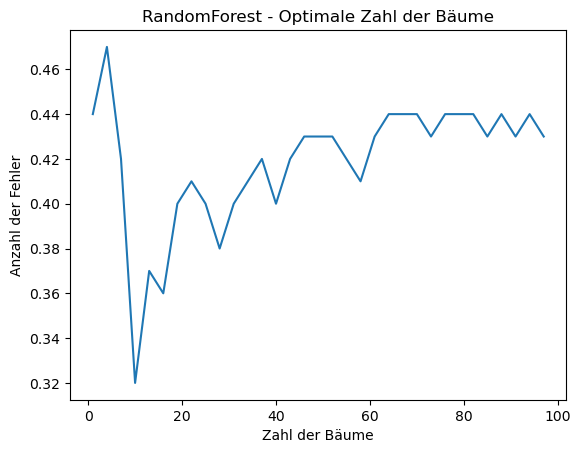

In [26]:
# ZAHL DER BÄUME
mae_scores = []
n_estimators_range = range(1, 100, 3)

for n_estimators in n_estimators_range:
    model= RandomForestClassifier(n_estimators=n_estimators, random_state=42)
    model.fit(X_train[:100], y_train[:100])
    predictions = model.predict(X_test[:100])
    mae = mean_absolute_error(y_test[:100], predictions)
    mae_scores.append(mae)

plt.plot(n_estimators_range, mae_scores)
plt.xlabel('Zahl der Bäume')
plt.ylabel('Anzahl der Fehler')
plt.title('RandomForest - Optimale Zahl der Bäume')
plt.show()

Eindeutig zu sehen, dass die optimale Zahl der Bäume 10 ist

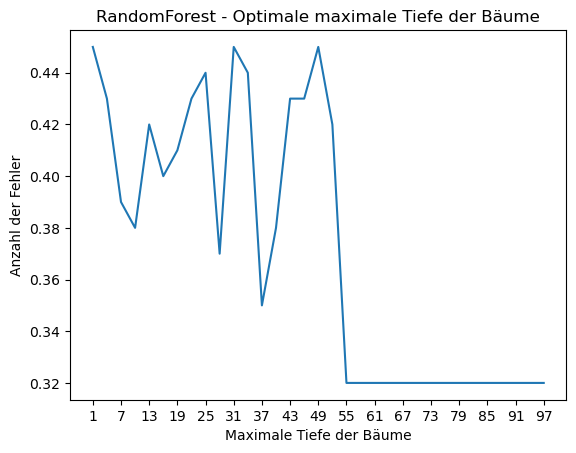

In [32]:
# TIEFE DER BÄUME
mae_scores = []
max_depth_range = range(1, 100, 3)

for max_depth in max_depth_range:
    model= RandomForestClassifier(n_estimators=10, max_depth=max_depth, random_state=42)
    model.fit(X_train[:100], y_train[:100])
    predictions = model.predict(X_test[:100])
    mae = mean_absolute_error(y_test[:100], predictions)
    mae_scores.append(mae)

plt.plot(max_depth_range, mae_scores)
plt.xlabel('Maximale Tiefe der Bäume')
plt.xticks(range(1, 100, 6))
plt.ylabel('Anzahl der Fehler')
plt.title('RandomForest - Optimale maximale Tiefe der Bäume')
plt.show()

Die optimale Tiefe der Bäume liegt bei 55.

## I.4. GradientBoosting

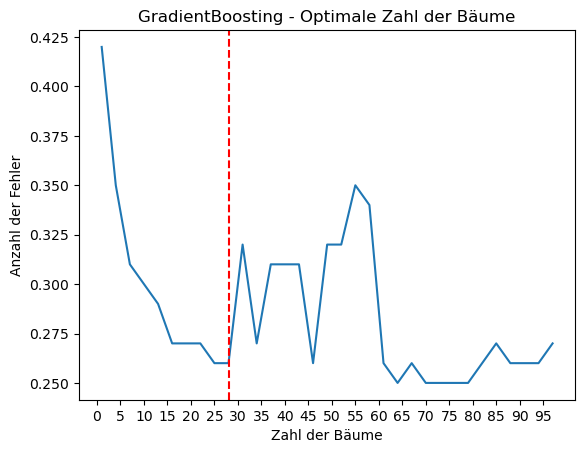

In [36]:
# ZAHL DER BÄUME
mae_scores = []
n_estimators_range = range(1, 100, 3)

for n_estimators in n_estimators_range:
    model= GradientBoostingClassifier(n_estimators=n_estimators, random_state=42)
    model.fit(X_train[:100], y_train[:100])
    predictions = model.predict(X_test[:100])
    mae = mean_absolute_error(y_test[:100], predictions)
    mae_scores.append(mae)

plt.plot(n_estimators_range, mae_scores)
plt.axvline(x=28, color='red', linestyle='--')
plt.xlabel('Zahl der Bäume')
plt.xticks(range(0, 100, 5))
plt.ylabel('Anzahl der Fehler')
plt.title('GradientBoosting - Optimale Zahl der Bäume')
plt.show()

Die optimale Zahl der Bäume liegt bei 28.

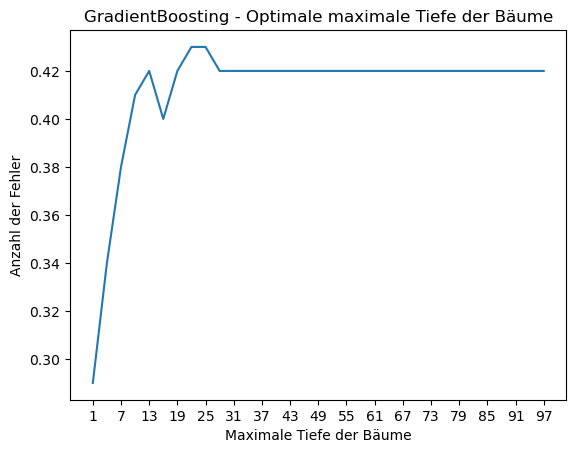

In [39]:
# TIEFE DER BÄUME
mae_scores = []
max_depth_range = range(1, 100, 3)

for max_depth in max_depth_range:
    model= GradientBoostingClassifier(n_estimators=28, max_depth=max_depth, random_state=42)
    model.fit(X_train[:100], y_train[:100])
    predictions = model.predict(X_test[:100])
    mae = mean_absolute_error(y_test[:100], predictions)
    mae_scores.append(mae)

plt.plot(max_depth_range, mae_scores)
plt.xlabel('Maximale Tiefe der Bäume')
plt.xticks(range(1, 100, 6))
plt.ylabel('Anzahl der Fehler')
plt.title('GradientBoosting - Optimale maximale Tiefe der Bäume')
plt.show()

Wenn der mae-Wert für das GradientBoosting-Modell bei einer Tiefe von 1 erstaunlich niedrig ist im Vergleich zu den anderen Tiefe-Werten, kann dies auf Overfitting hinweisen. Ich teste unterschiedliche Tiefe-Werte auf dem anderen Datensatz und vergleiche diesmal die Recall-Werte

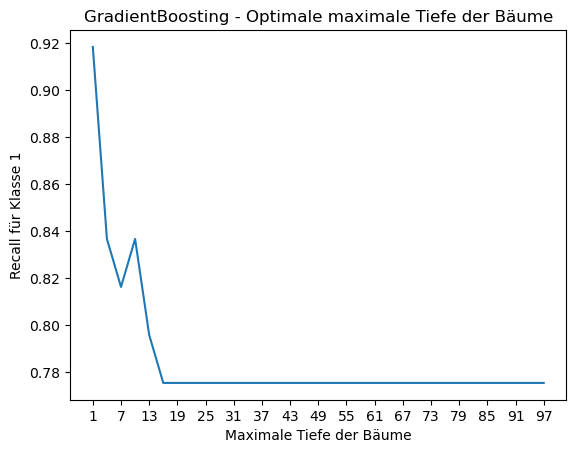

In [50]:
recalls = []
max_depth_range = range(1, 100, 3)

for max_depth in max_depth_range:
    model= GradientBoostingClassifier(n_estimators=28, max_depth=max_depth, random_state=42)
    model.fit(X_train[101:200], y_train[101:200])
    predictions = model.predict(X_test[101:200])
    recall = recall_score(y_test[101:200], predictions, pos_label=1)
    recalls.append(recall)

plt.plot(max_depth_range, recalls)
plt.xlabel('Maximale Tiefe der Bäume')
plt.xticks(range(1, 100, 6))
plt.ylabel('Recall für Klasse 1')
plt.title('GradientBoosting - Optimale maximale Tiefe der Bäume')
plt.show()

Recall-Kurve bestätigt, dass wir wahrscheinlich mit dem Overfitting zu tun haben. Aber ich probiere das Modell trotzdem aus und schaue, welche Resultate sie im Vergleich zu den anderen zeigt.

Als Tiefe der Bäume nehme ich dann tatsächlich 1.

In [51]:
# LERNRATE

param_grid = {'learning_rate': [0.1, 0.01, 0.001]}

grid_search = GridSearchCV(GradientBoostingClassifier(n_estimators=10, max_depth=55, random_state=42), param_grid, cv=3)
grid_search.fit(X_train[:100], y_train[:100])

print(f"Die besten Parameter: {grid_search.best_params_}")

Die besten Parameter: {'learning_rate': 0.01}


Ich übernehme alle gefundenen optimalen Parameter der Modelle und vergleiche die Modelle miteinander.

## II. Die Modelle miteinander vergleichen

C:\Users\natal\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


--------------------LogistiRegression------------------------

              precision    recall  f1-score   support

           0       0.89      0.85      0.87      5036
           1       0.86      0.90      0.88      4926

    accuracy                           0.87      9962
   macro avg       0.87      0.87      0.87      9962
weighted avg       0.87      0.87      0.87      9962
 

--------------------NaiveBayes------------------------

              precision    recall  f1-score   support

           0       0.85      0.88      0.87      5036
           1       0.88      0.84      0.86      4926

    accuracy                           0.86      9962
   macro avg       0.86      0.86      0.86      9962
weighted avg       0.86      0.86      0.86      9962
 

--------------------RandomForest------------------------

              precision    recall  f1-score   support

           0       0.80      0.75      0.77      5036
           1       0.76      0.81      0.78      4926

 

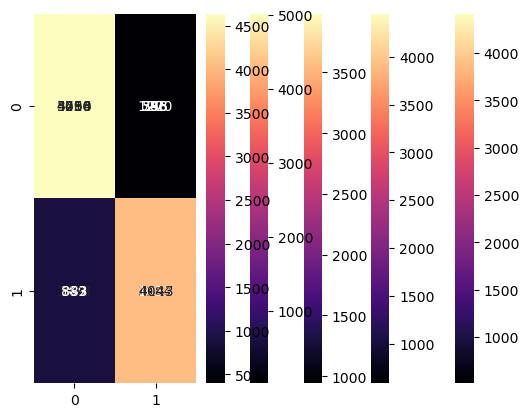

In [53]:
# MODELLERSTELLUNG
model_lg = LogisticRegression(class_weight={0:1, 1:3})
model_nb = MultinomialNB()
model_rf = RandomForestClassifier(n_estimators=10, max_depth=55)
model_gb = GradientBoostingClassifier(n_estimators=28, max_depth=1, learning_rate=0.01)
model_sv = SVC(C=10, gamma=0.01)

# TRAINIEREN
model_lg.fit(X_train, y_train)
model_nb.fit(X_train, y_train)
model_rf.fit(X_train, y_train)
model_gb.fit(X_train, y_train)
model_sv.fit(X_train, y_train)

# PREDICTEN
predictions_lg = model_lg.predict(X_test)
predictions_nb = model_nb.predict(X_test)
predictions_rf = model_rf.predict(X_test)
predictions_gb = model_gb.predict(X_test)
predictions_sv = model_sv.predict(X_test)

# CLASSIFICATION REPORT
print("--------------------LogistiRegression------------------------\n")
print(classification_report(y_test, predictions_lg), "\n")
print("--------------------NaiveBayes------------------------\n")
print(classification_report(y_test, predictions_nb), "\n")
print("--------------------RandomForest------------------------\n")
print(classification_report(y_test, predictions_rf), "\n")
print("--------------------GradientBoosting------------------------\n")
print(classification_report(y_test, predictions_gb), "\n")
print("--------------------SupportVector------------------------\n")
print(classification_report(y_test, predictions_sv), "\n")

# CONFUSION MATRIX
print("--------------------LogistiRegression------------------------\n")
sns.heatmap(confusion_matrix(y_test, predictions_lg), annot=True, fmt='d', cmap="magma")
plt.show()
print("--------------------NaiveBayes------------------------\n")
sns.heatmap(confusion_matrix(y_test, predictions_nb), annot=True, fmt='d', cmap="magma")
plt.show()
print("--------------------RandomForest------------------------\n")
sns.heatmap(confusion_matrix(y_test, predictions_rf), annot=True, fmt='d', cmap="magma")
plt.show()
print("--------------------GradientBoosting------------------------\n")
sns.heatmap(confusion_matrix(y_test, predictions_gb), annot=True, fmt='d', cmap="magma")
plt.show()
print("--------------------SupportVector------------------------\n")
sns.heatmap(confusion_matrix(y_test, predictions_sv), annot=True, fmt='d', cmap="magma")
plt.show()

## III. Pipeline Modell

Pipeline Modell wird benutzt, um dem Modell einen nicht vectorisierten Text geben zu können.

In [63]:
model_pipeline = Pipeline([
    ("vectorizer", CountVectorizer(tokenizer=lambda x: tokenized_and_stemmed(x), lowercase=False)),
    ("model", LogisticRegression(class_weight={0: 1, 1: 3}))
])
model_pipeline.fit(df["comment_text"], df["label"])

C:\Users\natal\anaconda3\lib\site-packages\sklearn\feature_extraction\text.py:528: UserWarning: The parameter 'token_pattern' will not be used since 'tokenizer' is not None'
  warnings.warn(
C:\Users\natal\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


Pipeline(steps=[('vectorizer',
                 CountVectorizer(lowercase=False,
                                 tokenizer=<function <lambda> at 0x000001EC15DE29E0>)),
                ('model', LogisticRegression(class_weight={0: 1, 1: 3}))])

## IV. TEST

In [71]:
# TEST
print("-----Nicht toxische Kommentare, sollten alle als 0 predictet werden-------\n")
print(model_pipeline.predict(["Wie hast du es gemacht?"]))
print(model_pipeline.predict(["Ich habe diesen Film schon mal gesehen"]))
print(model_pipeline.predict(["Du sieht so süß aus"]))
print(model_pipeline.predict(["das kann man auch online bestellen"]))

print("--------Toxische Kommentare, sollten alle als 1 predictet werden----------\n")
print(model_pipeline.predict(["Du wirst in der Hölle schmoren!"]))
print(model_pipeline.predict(["fick dich du arschloch"]))
print(model_pipeline.predict(["Halt die Schnauze!"]))
print(model_pipeline.predict(["Dieser Nigger hatte im Club nichts zu suchen"]))

-----Nicht toxische Kommentare, sollten alle als 0 predictet werden-------

[0]
[0]
[1]
[0]
--------Toxische Kommentare, sollten alle als 1 predictet werden----------

[1]
[1]
[1]
[1]


In [82]:
# TEST Nr. 2

def predict_comment(text):
    klasse = model_pipeline.predict([text])
    proba = model_pipeline.predict_proba([text])
    if klasse == 1:
        return klasse, round(proba[0][1]*100, 2)
    else:
        return klasse, round(proba[0][0]*100, 2)

comment_1 = "Wie hast du es gemacht?"
comment_2 = "Ich habe diesen Film schon mal gesehen"
comment_3 = "Du sieht so süß aus"
comment_4 = "das kann man auch online bestellen"

comment_5 = "Du wirst in der Hölle schmoren!"
comment_6 = "fick dich du arschloch"
comment_7 = "Halt die Schnauze!"
comment_8 = "Dieser Nigger hatte im Club nichts zu suchen"

klasse, proba = predict_comment(comment_1)
print(f"Der Kommentar '{comment_1}' ist {'toxisch' if klasse==1 else 'nicht toxisch'} mit der Wahrscheinlichkeit von {proba}%\n")

klasse, proba = predict_comment(comment_2)
print(f"Der Kommentar '{comment_2}' ist {'toxisch' if klasse==1 else 'nicht toxisch'} mit der Wahrscheinlichkeit von {proba}%\n")

klasse, proba = predict_comment(comment_3)
print(f"Der Kommentar '{comment_3}' ist {'toxisch' if klasse==1 else 'nicht toxisch'} mit der Wahrscheinlichkeit von {proba}%\n")

klasse, proba = predict_comment(comment_4)
print(f"Der Kommentar '{comment_4}' ist {'toxisch' if klasse==1 else 'nicht toxisch'} mit der Wahrscheinlichkeit von {proba}%\n")

klasse, proba = predict_comment(comment_5)
print(f"Der Kommentar '{comment_5}' ist {'toxisch' if klasse==1 else 'nicht toxisch'} mit der Wahrscheinlichkeit von {proba}%\n")

klasse, proba = predict_comment(comment_6)
print(f"Der Kommentar '{comment_6}' ist {'toxisch' if klasse==1 else 'nicht toxisch'} mit der Wahrscheinlichkeit von {proba}%\n")

klasse, proba = predict_comment(comment_7)
print(f"Der Kommentar '{comment_7}' ist {'toxisch' if klasse==1 else 'nicht toxisch'} mit der Wahrscheinlichkeit von {proba}%\n")

klasse, proba = predict_comment(comment_8)
print(f"Der Kommentar '{comment_8}' ist {'toxisch' if klasse==1 else 'nicht toxisch'} mit der Wahrscheinlichkeit von {proba}%\n")


Der Kommentar 'Wie hast du es gemacht?' ist nicht toxisch mit der Wahrscheinlichkeit von 52.77%

Der Kommentar 'Ich habe diesen Film schon mal gesehen' ist nicht toxisch mit der Wahrscheinlichkeit von 77.36%

Der Kommentar 'Du sieht so süß aus' ist toxisch mit der Wahrscheinlichkeit von 81.61%

Der Kommentar 'das kann man auch online bestellen' ist nicht toxisch mit der Wahrscheinlichkeit von 56.42%

Der Kommentar 'Du wirst in der Hölle schmoren!' ist toxisch mit der Wahrscheinlichkeit von 99.13%

Der Kommentar 'fick dich du arschloch' ist toxisch mit der Wahrscheinlichkeit von 100.0%

Der Kommentar 'Halt die Schnauze!' ist toxisch mit der Wahrscheinlichkeit von 58.46%

Der Kommentar 'Dieser Nigger hatte im Club nichts zu suchen' ist toxisch mit der Wahrscheinlichkeit von 97.16%



## V. SPEICHERN DES MODELLS IN EINE DATEI

In [ ]:
with open('model_toxic_comments.pkl', 'wb') as file:
    pickle.dump(model_pipeline, file)